In [1]:
!pip -q install vaex
!pip -q install vaex.ui
!pip -q install IPython==7.0.0
!pip -q install PyQt5

     |████████████████████████████████| 2.4MB 11.7MB/s 
     |████████████████████████████████| 102kB 5.1MB/s 
     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 11.7MB 55.8MB/s 
     |████████████████████████████████| 3.3MB 62.3MB/s 
     |████████████████████████████████| 2.9MB 38.5MB/s 
     |████████████████████████████████| 112kB 38.4MB/s 
     |████████████████████████████████| 1.2MB 38.0MB/s 
     |████████████████████████████████| 2.7MB 36.7MB/s 
     |████████████████████████████████| 3.4MB 41.4MB/s 
     |████████████████████████████████| 266kB 56.7MB/s 
     |████████████████████████████████| 276kB 56.9MB/s 
     |████████████████████████████████| 296kB 10.9MB/s 
     |████████████████████████████████| 768kB 9.2MB/s 
     |████████████████████████████████| 348kB 20.7MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: google-colab 1.0.0 h

`uruchom ponownie środowisko wykonawcze (ctr+M.)`

In [1]:
exit()

In [2]:
import warnings
warnings.filterwarnings("ignore")

Tutorial for vaex as a library


In [3]:
import vaex as vx
import numpy as np
import matplotlib.pylab as plt # simpler interface for matplotlib
# next line configures matplotlib to show the plots in the notebook, other option is qt to open a dialog
%matplotlib inline

## Open a dataset
To open a dataset, we can call vx.open to open local files. See the documentation of [vaex.open](api.html#vaex.open) for the arguments, hit shift-tab (1 or 2 times) or run `vx.open?` in the notebook for direct help. For this tutorial we use `vx.example()` which opens a dataset provided with vaex. (_Note that ds is short for dataset_)

In [4]:
ds = vx.example()
# ds = vx.open('yourfile.hdf5') # in case you want to load a different dataset

You can get information about the dataset, such as the columns by simply typing `ds` as the last command in a cell.

In [5]:
ds

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.2318683862686157,-0.39692866802215576,-0.598057746887207,301.1552734375,174.05947875976562,27.42754554748535,-149431.40625,407.38897705078125,333.9555358886719,-1.0053852796554565
1,23,-0.16370061039924622,3.654221296310425,-0.25490644574165344,-195.00022888183594,170.47216796875,142.5302276611328,-124247.953125,890.2411499023438,684.6676025390625,-1.7086670398712158
2,32,-2.120255947113037,3.326052665710449,1.7078403234481812,-48.63423156738281,171.6472930908203,-2.079437255859375,-138500.546875,372.2410888671875,-202.17617797851562,-1.8336141109466553
3,8,4.7155890464782715,4.5852508544921875,2.2515437602996826,-232.42083740234375,-294.850830078125,62.85865020751953,-60037.0390625,1297.63037109375,-324.6875,-1.4786882400512695
4,16,7.21718692779541,11.99471664428711,-1.064562201499939,-1.6891745328903198,181.329345703125,-11.333610534667969,-83206.84375,1332.7989501953125,1328.948974609375,-1.8570483922958374
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",21,1.9938701391220093,0.789276123046875,0.22205990552902222,-216.92990112304688,16.124420166015625,-211.244384765625,-146457.4375,457.72247314453125,203.36758422851562,-1.7451677322387695
"329,996",25,3.7180912494659424,0.721337616443634,1.6415337324142456,-185.92160034179688,-117.25082397460938,-105.4986572265625,-126627.109375,335.0025634765625,-301.8370056152344,-0.9822322130203247
"329,997",14,0.3688507676124573,13.029608726501465,-3.633934736251831,-53.677146911621094,-145.15771484375,76.70909881591797,-84912.2578125,817.1375732421875,645.8507080078125,-1.7645612955093384
"329,998",18,-0.11259264498949051,1.4529125690460205,2.168952703475952,179.30865478515625,205.79710388183594,-68.75872802734375,-133498.46875,724.000244140625,-283.6910400390625,-1.8808952569961548


To get a list with all column names, use Dataset's [get_column_names](api.html#vaex.dataset.Dataset.get_column_names) method. Note that tab completion should work, typing `ds.get_c` and then pressing tab should help your complete it.


In [6]:
ds.get_column_names()

['id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E', 'L', 'Lz', 'FeH']

## Calculating statistics
Vaex can calculate statistics for colums, but also for an expression build from columns.

In [7]:
ds.mean("x"), ds.std("x"), ds.correlation("vx**2+vy**2+vz**2", "E")

(array(-0.0632868), 7.275986820041604, array(0.01371104))

Since columns names can sometimes be difficult to remember, and to take advantage of the autocomplete features of the Notebook, column names can be accessed using the .col property, for instance

In [8]:
print(ds.col.x)

x


In [9]:
ds.mean(ds.col.x)

array(-0.0632868)

Dataset contains many methods to compute statistics, and plotting routines, see the API documentation for more details, for instance for:

* [Dataset.count](api.html#vaex.dataset.Dataset.count)
* [Dataset.mean](api.html#vaex.dataset.Dataset.mean)
* [Dataset.std](api.html#vaex.dataset.Dataset.std)
* [Dataset.var](api.html#vaex.dataset.Dataset.var)
* [Dataset.median_approx](api.html#vaex.dataset.Dataset.median_approx)
* [Dataset.percentile_approx](api.html#vaex.dataset.Dataset.percentile_approx)
* [Dataset.mode](api.html#vaex.dataset.Dataset.median)
* [Dataset.min](api.html#vaex.dataset.Dataset.min)
* [Dataset.max](api.html#vaex.dataset.Dataset.max)
* [Dataset.minmax](api.html#vaex.dataset.Dataset.minmax)
* [Dataset.mutual_information](api.html#vaex.dataset.Dataset.mutual_information)
* [Dataset.correlation](api.html#vaex.dataset.Dataset.correlation)
* [Dataset.histogram](api.html#vaex.dataset.Dataset.histogram)
* [Dataset.plot](api.html#vaex.dataset.Dataset.plot)
* [Dataset.plot_bq](api.html#vaex.dataset.Dataset.plot_bq)
* [Dataset.plot1d](api.html#vaex.dataset.Dataset.plot1d)

Most of the statistics can also be calculated on a grid, which can also be visualized using for instance matplotlib.

In [10]:
ds.mean("E", binby=["x", "y"], shape=(2,2), limits=[[-10,10], [-10, 10]])

array([[-118905.96205342, -118457.556242  ],
       [-117711.94836555, -119620.9500176 ]])

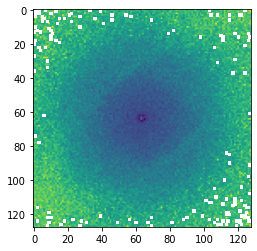

In [11]:
mean_energy = ds.mean("E", binby=["x", "y"], shape=(128,128), limits=[[-10,10], [-10, 10]])
plt.imshow(mean_energy)

## Plotting
Instead of using "bare" matplotlib to plot, using the .plot method is more convenient. It sets axes limits, labels (with units when known), and adds a colorbar. Learn more using the docstring, by typing `ds.plot?` or using shift-tab, or opening [Dataset.plot](api.html#vaex.dataset.Dataset).

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


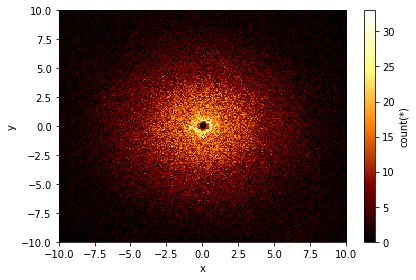

In [12]:
ds.plot("x", "y", limits=[[-10,10], [-10, 10]]);

Instead of plotting the counts, the mean of an expression can be plotted. (Other options are sum, std, var, correlation, covar, min, max) 

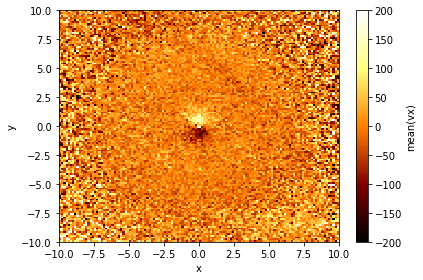

In [13]:
ds.plot("x", "y", what="mean(vx)", limits=[[-10,10], [-10, 10]], vmin=-200, vmax=200, shape=128);

More panels can be plotting giving a list of pairs of expressions as the first argument (which we call a subspace).

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:804: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = pylab.subplot(gs[row_offset + row * row_scale:row_offset + (row + 1) * row_scale, column * column_scale:(column + 1) * column_scale])


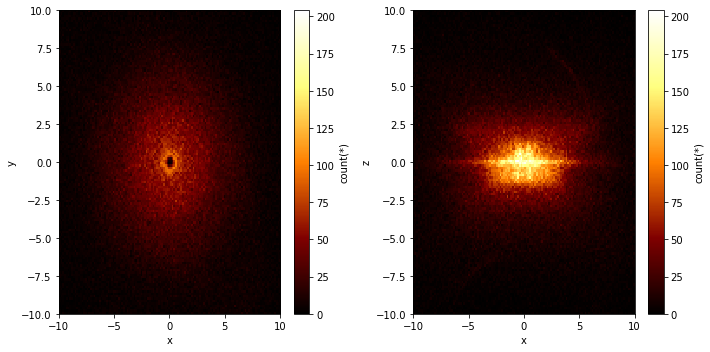

In [15]:
ds.plot([["x", "y"], ["x", "z"]], limits=[[-10, 10], [-10, 10]], figsize=(10,5), shape=128);

And the same can be done for the `what` argument. Note that the f argument is the transformation that will be applied to the values, for instance "log", "log10", "abs", or None when doing no transformation. If given as a single argument, if will apply to all plots, otherwise it should be a list of the same length as the what argument.

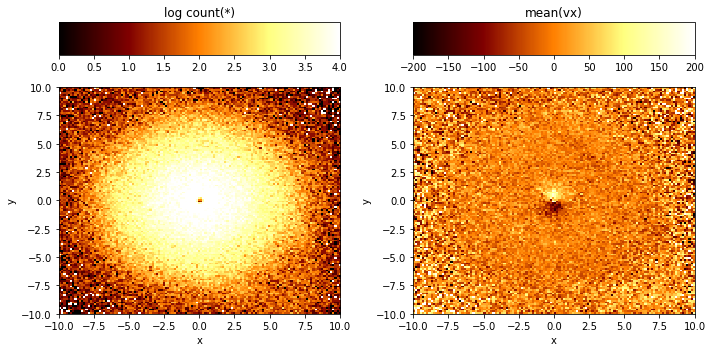

In [14]:
ds.plot("x", "y", what=["count(*)", "mean(vx)"], f=["log", None],
        limits=[[-10, 10], [-10, 10]], figsize=(10,5), shape=128, vmin=[0, -200], vmax=[4, 200]);

When they are combined, `what` will form the columns of a subplot, while the rows are the different subspaces.

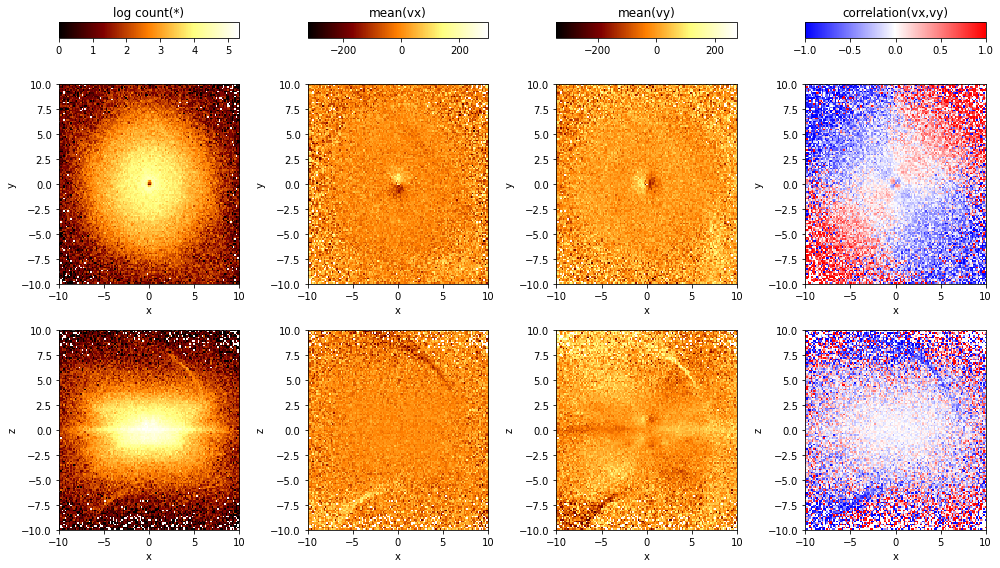

In [16]:
ds.plot([["x", "y"], ["x", "z"]],  f=["log", None, None, None],
        what=["count(*)", "mean(vx)", "mean(vy)", "correlation(vx,vy)"],
        colormap=["afmhot", "afmhot", "afmhot", "bwr"],
        limits=[[-10, 10], [-10, 10]], figsize=(14,8), shape=128);

## Selections
For working with a part of the data, we use what we call selections. When a selection is applied to a dataset, it keeps a boolean in memory for each row indicating it is selected or not. All statistical methods take a selection argument, which can be `None` or `False` for no selection, `True` or `"default"` for the default selection, or a string refering to the selection (corresponding to the name argument of the [Dataset.select](api.html#vaex.dataset.Dataset) method). It is also possible to have expressions in a selection, but these selections will not be cached and computed every time when needed.

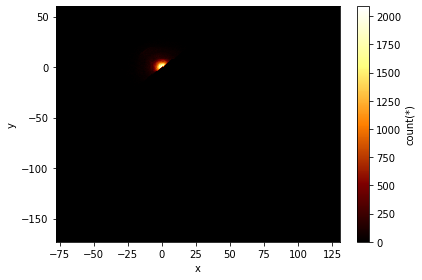

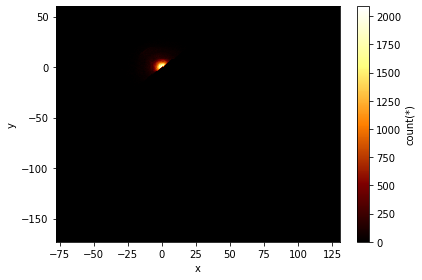

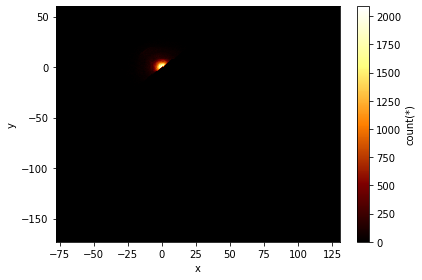

In [17]:
# the following plots are all identical
ds.select("y > x")
ds.plot("x", "y", selection=True, show=True)
ds.plot("x", "y", selection="default", show=True) # same as the previous
ds.plot("x", "y", selection="y > x", show=True); # similar, but selection will be recomputed every time


Multiple selections can be overplotted, where `None` means no selection, and `True` is an alias for the default selection name of "default". The selections will be overplotted where the background will be `faded`.  (Note that becase the log is taken of zero, this results in NaN, which is shown as transparent pixels.)

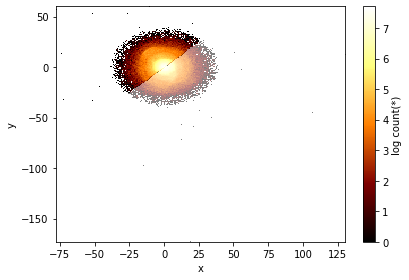

In [18]:
ds.plot("x", "y", selection=[None, True], f="log");

Selection can be made more complicated, or can be logically combined using a boolean operator. The default is to replace the current selections, other possiblities are: "replace", "and", "or", "xor", "subtract"

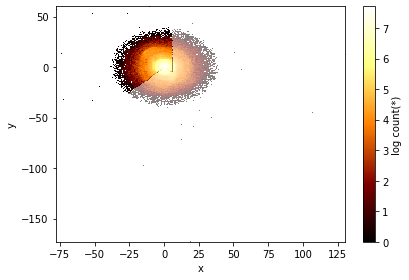

In [19]:
ds.select("y > x")
ds.select("y > -x", mode="or")
# this next line has the same effect as the above two
# dataset.select("(y > x) | (x > -y)")
# |,& and ^ are used for 'or' 'and', and 'xor'
ds.select("x > 5", mode="subtract")
ds.plot("x", "y", selection=[None, True], f="log");

Using the visual argument, it is possible to show the selections as columns instead, see [Dataset.plot](api.html#vaex.dataset.Dataset.plot) for more details.

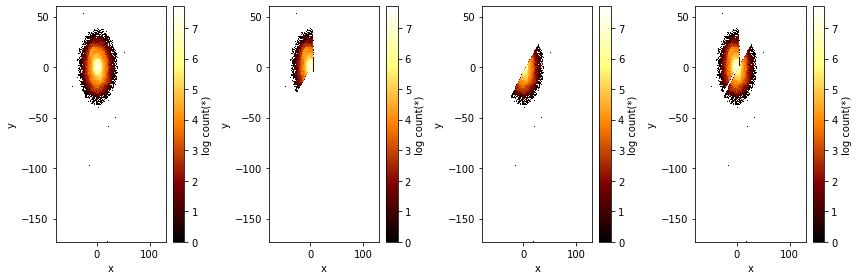

In [20]:
ds.select("x - 5> y", name="other")
ds.plot("x", "y", selection=[None, True, "other", "other | default"],
        f="log", visual=dict(column="selection"), figsize=(12,4));

Besides making plots, statisics can also be computed for selections

In [21]:
ds.max("x", selection=True)

array(4.99935, dtype=float32)

In [22]:
ds.max("x", selection=[None, True])

array([130.49751,   4.99935], dtype=float32)

In [23]:
ds.max(["x", "y"], selection=[None, True])

array([[130.49751 ,   4.99935 ],
       [ 60.022778,  60.022778]], dtype=float32)

In [24]:
ds.mean(["x", "y"], selection=[None, True, "other", "x > y"])

array([[-0.0632868 , -2.96057126,  5.89549191,  3.58152993],
       [-0.04348718,  2.98769183, -6.90656529, -4.18386193]])

## Virtual columns
If a particular expression occurs often, it may be convenient to create a virtual column, it behaves exactly like a normal column, but it is calculated on the fly (without taking up the memory of a full column, since it is done is chunks).

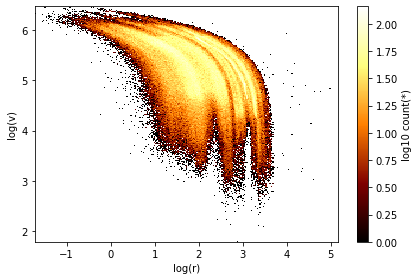

In [25]:
ds.add_virtual_column("r", "sqrt(x**2+y**2+z**2)")
ds.add_virtual_column("v", "sqrt(vx**2+vy**2+vz**2)")
ds.plot("log(r)", "log(v)", f="log10");

Extra methods for creating common virtual columns are:

 * [add_virtual_column](api.html#vaex.dataset.Dataset.add_virtual_column)
 * [add_virtual_column_bearing](api.html#vaex.dataset.Dataset.add_virtual_column_bearing)
 * [add_virtual_columns_aitoff](api.html#vaex.dataset.Dataset.add_virtual_columns_aitoff)
 * [add_virtual_columns_cartesian_to_spherical](api.html#vaex.dataset.Dataset.add_virtual_columns_cartesian_to_spherical)
 * [add_virtual_columns_celestial](api.html#vaex.dataset.Dataset.add_virtual_columns_celestial)
 * [add_virtual_columns_eq2ecl](api.html#vaex.dataset.Dataset.add_virtual_columns_eq2ecl)
 * [add_virtual_columns_eq2gal](api.html#vaex.dataset.Dataset.add_virtual_columns_eq2gal)
 * [add_virtual_columns_equatorial_to_galactic_cartesian](api.html#vaex.dataset.Dataset.add_virtual_columns_equatorial_to_galactic_cartesian)
 * [add_virtual_columns_lbrvr_proper_motion2vcartesian](api.html#vaex.dataset.Dataset.add_virtual_columns_lbrvr_proper_motion2vcartesian)
 * [add_virtual_columns_matrix3d](api.html#vaex.dataset.Dataset.add_virtual_columns_matrix3d)
 * [add_virtual_columns_proper_motion_eq2gal](api.html#vaex.dataset.Dataset.add_virtual_columns_proper_motion_eq2gal)
 * [add_virtual_columns_rotation](api.html#vaex.dataset.Dataset.add_virtual_columns_rotation)
 * [add_virtual_columns_spherical_to_cartesian](api.html#vaex.dataset.Dataset.add_virtual_columns_spherical_to_cartesian)
 
Don't fear to look at the source (click the green link [source]).
 

## Efficient use of multiple calculations
Imaging you want to calcule the correlation coefficient for a few subspaces. First we calculate it for E and Lz.

In [30]:
ds.correlation("E", "Lz")

array(-0.09548198)

In the process, all the data for the column E and Lz was processed, if we now calculate the correlation coefficient for E and L, we go over the data for column E again. Especially if the data does not fit into memory, this is quiet inefficient.

In [31]:
ds.correlation("E", "L")

array(0.69007578)

If instead, we call the correlation method with a list of subspaces, there is only one pass over the data, which can me much more efficient.

In [32]:
ds.correlation([["E", "Lz"], ["E", "L"]])

array([-0.09548198,  0.69007578])

Especially if many subspaces are used, as in the following example.

In [33]:
subspaces = ds.combinations()
correlations = ds.correlation(subspaces)
mutual_informations = ds.mutual_information(subspaces)

In [34]:
from astropy.io import ascii
import sys
names = ["_".join(subspace) for subspace in subspaces]
ascii.write([names, correlations, mutual_informations], sys.stdout,
            names=["names", "correlation", "mutual_information"])
# replace sys.stdout by a filename such as "example.asc"
filename_asc = tempfile.mktemp(suffix=".asc")
ascii.write([names, correlations, mutual_informations], filename_asc,
            names=["names", "correlation", "mutual_information"])

print("--------")
# or write it as a latex table
ascii.write([names, correlations, mutual_informations],
            sys.stdout, names=["names", "correlation", "mutual information"], Writer=ascii.Latex)


names correlation mutual_information
id_x 0.0033310184412645716 0.292100278291445
id_y -9.828497755514193e-05 0.3349094462735207
id_z 0.03225166822466986 0.49143589707241253
id_vx -0.004912755696811454 0.048704998371283934
id_vy -0.0019980793465936876 0.04784235061054398
id_vz -0.014046153056901637 0.11533273991712151
id_E -0.12833856551687342 1.7408881849680062
id_L -0.012462995292550351 0.999067090409594
id_Lz -0.22248699838321526 1.9429393238367036
id_FeH 0.052951200616882396 1.1195113221724338
id_r -0.0525902959850844 0.6985661262811713
id_v 0.006905410402584718 0.13483836676528177
x_y -0.06668907032570766 0.06893435879466822
x_z -0.027097191828992825 0.11656418077043443
x_vx -0.0053831476813168055 0.052866991737588735
x_vy -0.0010505709037274525 0.12189764063764524
x_vz 0.02126099236747876 0.06797721462902981
x_E -0.011163152856934038 0.32316291143749176
x_L -0.02534202394753744 0.13660108461689513
x_Lz -0.0036926786113698293 0.16110026360882562
x_FeH 0.006726879335778885 0.064868

In [35]:
# reading it back in
table = ascii.read(filename_asc)
print("this is an astropy table:\n", table)
correlations = table["correlation"]
print
print("this is an astropy column:\n", correlations)
print
print("this is the numpy data:\n", correlations.data)
# short: table["correlation"].data

this is an astropy table:
 names       correlation        mutual_information 
------ ---------------------- --------------------
  id_x  0.0033310184412645716    0.292100278291445
  id_y -9.828497755514193e-05   0.3349094462735207
  id_z    0.03225166822466986  0.49143589707241253
 id_vx  -0.004912755696811454 0.048704998371283934
 id_vy -0.0019980793465936876  0.04784235061054398
 id_vz  -0.014046153056901637  0.11533273991712151
  id_E   -0.12833856551687342   1.7408881849680062
  id_L  -0.012462995292550351    0.999067090409594
 id_Lz   -0.22248699838321526   1.9429393238367036
id_FeH   0.052951200616882396   1.1195113221724338
   ...                    ...                  ...
   E_v  0.0012578280539140545  0.08038349879885145
  L_Lz   -0.13200887028791214    1.039616178136636
 L_FeH   -0.25665739057136044   0.3021865000397157
   L_r     0.4923415460428578  0.28799097350120423
   L_v    0.09152861742693494  0.13425807649719385
Lz_FeH    -0.3862387331037141   0.4549972569974634
  Lz